# Apple Inc
## AAPL Stock price predication

This project is focused on the development of a sophisticated machine learning model designed to accurately predict a company's closing stock price based on its opening price, intraday high, and the price fluctuations observed throughout the trading day. By employing advanced supervised learning algorithms, the model will analyze historical stock market data to uncover underlying patterns and relationships between these key price indicators. The ultimate goal is to enhance the accuracy of stock price predictions, providing valuable insights for investors and financial analysts.

### Importing Necessary Libraries for Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

### Loading the Data

In [2]:
df=pd.read_csv('Data Set.csv')
df=pd.DataFrame(df)

* The dataset encompasses data from 10 different companies. For the purpose of this project, we will be isolating and analyzing the data specific to Apple Inc. by slicing the dataset accordingly. This focused approach allows us to tailor the model’s predictions to Apple’s stock behavior, ensuring a more precise and relevant analysis.

In [3]:
df=df.iloc[:2431]
df

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,AAPL,27.847500,27.860001,26.837500,27.332500,24.373959,212818400
1,2015-01-05,AAPL,27.072500,27.162500,26.352501,26.562500,23.687313,257142000
2,2015-01-06,AAPL,26.635000,26.857500,26.157499,26.565001,23.689535,263188400
3,2015-01-07,AAPL,26.799999,27.049999,26.674999,26.937500,24.021711,160423600
4,2015-01-08,AAPL,27.307501,28.037500,27.174999,27.972500,24.944679,237458000
...,...,...,...,...,...,...,...,...
2426,2024-08-23,AAPL,225.660004,228.220001,224.330002,226.839996,226.839996,38677300
2427,2024-08-26,AAPL,226.759995,227.279999,223.889999,227.179993,227.179993,30602200
2428,2024-08-27,AAPL,226.000000,228.850006,224.889999,228.029999,228.029999,35934600
2429,2024-08-28,AAPL,227.919998,229.860001,225.679993,226.490005,226.490005,38052200


### Visualizing Features and Target Data
* Feature Relationship Visualization: We will create visualizations to explore the relationship between pairs of features and the target variable. This analysis helps to identify linear or non-linear relationships, detect clusters, and spot outliers, providing deeper insights into the data dynamics and aiding in feature selection.

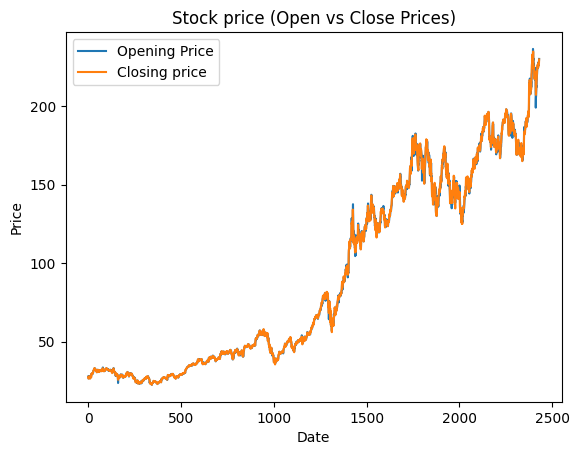

In [4]:
plt.plot(df['Open'],label='Opening Price')
plt.plot(df['Close'],label='Closing price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock price (Open vs Close Prices)')
plt.legend()
plt.show()

* From that We found a correlation between the open price and the closing price.

### Model Development Process:

* Feature Selection: For predicting the close price, the model will utilize the opening price as a mandatory feature, along with the high and low prices as additional features.

* Data Preparation: We will carefully select the feature columns (open, high, low) and the target column (close price). The dataset will then be processed and split into training and testing sets to ensure robust model performance.

* Training and Testing Split: The dataset will be divided, with 80% allocated for training the model and the remaining 20% reserved for testing and validation.

In [5]:
X=df[['Open','High','Low']]
y=df[['Close']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

### Creating and Training the Model
* Model Selection: We will employ a Linear Regression model for this task, leveraging its simplicity and effectiveness in predicting continuous outcomes such as stock prices.


In [6]:
Model=LinearRegression()
Model.fit(X_train,y_train)


LinearRegression()

### Making Predictions Using Test Data
* Prediction Phase: Once the model is trained, we will use the test data to make predictions on the closing prices. This step allows us to evaluate the model's performance by comparing the predicted values against the actual closing prices in the test set.

In [7]:
y_pred=Model.predict(X_test)

### Evaluate the Model
#### Performance Metrics:
+ Calculate Mean Squared Error (MSE): To measure the average squared difference between the predicted and actual values, providing insight into the model's prediction accuracy.
+ Calculate R-squared: To determine the proportion of variance in the dependent variable that is predictable from the independent variables, offering a gauge of the model's explanatory power.
+ Estimate Model Accuracy: By analyzing these metrics, we will assess the overall accuracy and reliability of the model in predicting the closing stock prices.

In [8]:
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print('MSE:',mse)
print('Accuracy:',int(r2*100),'%')

MSE: 0.43760419416292956
Accuracy: 99 %


### Visualizing Actual and Predicted Data
* Scatter Plot Analysis: We will use a scatter plot to compare the actual closing prices with the predicted closing prices. This visualization helps to assess how closely the predicted values align with the actual values, providing a clear indication of the model's performance.

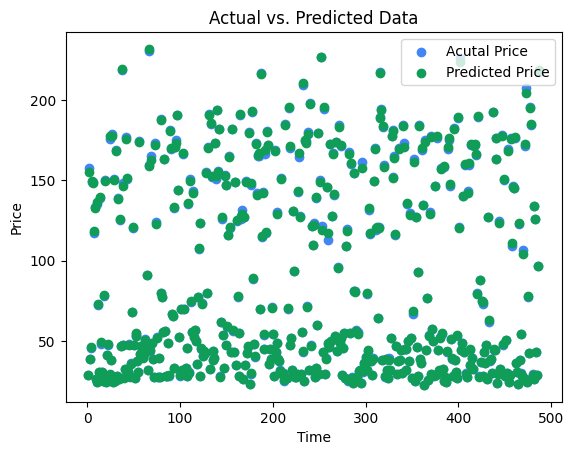

In [9]:
a=np.array([i for i in range(1,488)])
plt.scatter(a,np.array(y_test),color='#4285F4',label='Acutal Price')
plt.scatter(a,np.array(y_pred),color='#0F9D58',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Data')
plt.legend()
plt.show()

### Project Summary:

* Model Performance: The Linear Regression model achieved a remarkable 99% accuracy in predicting closing prices, demonstrating its effectiveness in stock price forecasting.

* Feature Impact: The opening price proved to be a critical factor in predicting the closing price, underscoring its significance in the model.

* Predictive Accuracy: The model's predictions closely followed historical trends, offering a solid foundation for developing trading strategies.

* Practical Applications: The insights gained can aid financial analysts and traders in refining trading strategies and enhancing portfolio performance.

* Future Improvements: To further enhance accuracy, future work could incorporate additional features like market sentiment or news data, explore advanced models such as LSTM or ARIMA, and optimize hyperparameters for better predictive performance.

